In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# کدام دسته از محصولات بیشترین نظرات را دارند؟ 

In [3]:
df2 = pd.read_excel('2.xlsx')

In [4]:
df5 = pd.read_excel('5.xlsx')

In [6]:
df5['product_id'] = df5['id']
comments_df = pd.merge(df5, df2, on='product_id')

In [7]:
comments_df.head()

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes,...,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,723227,اسپری ضد سوختگی ساووی مدل Antiseptic حجم 50 می...,Savoy Burn Relief Spray 50ml,اسپری-ضد-سوختگی-ساووی-مدل-antiseptic-حجم-50-می...,اسپری، ضد سوختگی، ضد سوزش، ضد تاول، ضد باکتری،...,کرم و ژل ترمیم کننده,کرم و ژل ترمیم کننده Repair-Cream,ساووی,Savoy,"[{""Key"":""نوع عصاره"",""Value"":""-""},{""Key"":""شماره...",...,PC,2441997,0,0,verified,\N,فوق العاده,این اسپری دارای فرمول انحصاری برای کشور انگلست...,NaN,NaN
1,725786,ساعت مچی عقربه ای زنانه مدل 7672,NaN,ساعت-مچی-عقربه-ای-زنانه-مدل-7672,ساعت،ساعت زنانه،ساعت ارزان،,ساعت مچی عقربه‌ای,ساعت مچی عقربه‌ای Analogue-Watch,متفرقه,Miscellaneous,"[{""Key"":""توضیحات قطب‌نمای دیجیتالی"",""Value"":""""...",...,FA,3166581,0,0,verified,\N,بسیار ضعیف,با سلام چند وقتی خریداری کردم موتور داغون هنوز...,NaN,NaN
2,725253,کیف کارت چرم تهران کیف مدل J44,NaN,کیف-کارت-چرم-تهران-کیف-مدل-j44,کیف ، کارت ، کارت ویزیت ، کارت بانکی ، جا کارت...,کیف پول,کیف پول Wallets,تهران کیف,Tehran Bag,"[{""Key"":""نوع"",""Value"":""کارت ویزیت""},{""Key"":""مح...",...,FA,7959068,1,0,verified,\N,خوبه ارزش خرید داره,خوبه ارزش خرید داره,NaN,NaN
3,727088,روبالشی صرمه طرح اصفهان مدل R-es112 بسته 2 عددی,NaN,روبالشی-صرمه-طرح-اصفهان-مدل-r-es112-بسته-2-عددی,روبالشی ، کالای خواب ، روتختی ، کودک ، نوجوان ...,رو بالشی,رو بالشی PillowsCover,متفرقه,Miscellaneous,"[{""Key"":""سایر توضیحات"",""Value"":""زیپ دار""},{""Ke...",...,HW,2882376,0,2,verified,no_idea,محل قرارگیری زیپ,دو تیکه پارچه به شکل کاملا ساده ای بهم دوخته ش...,NaN,NaN
4,727088,روبالشی صرمه طرح اصفهان مدل R-es112 بسته 2 عددی,NaN,روبالشی-صرمه-طرح-اصفهان-مدل-r-es112-بسته-2-عددی,روبالشی ، کالای خواب ، روتختی ، کودک ، نوجوان ...,رو بالشی,رو بالشی PillowsCover,متفرقه,Miscellaneous,"[{""Key"":""سایر توضیحات"",""Value"":""زیپ دار""},{""Ke...",...,HW,3083093,0,0,verified,\N,خرید را توصیه می کنم,سلام به نظرم خوبه و ارزش خرید داره نوع زیپشم ا...,"[""قیمت مناسب\r"",""زیپ دار""]",NaN


In [8]:
categories = comments_df['category_title_fa'].unique()
print(categories)

['کرم و ژل ترمیم کننده' 'ساعت مچی عقربه\u200cای' 'کیف پول' 'رو بالشی'
 'مایو' 'کیف و کوله مدرسه' 'ماگ، لیوان و فنجان'
 'تاپ، تونیک و سارافون زنانه' 'کفش زنانه' 'دمپایی'
 'استیکر و تابلو کودک و نوزاد' 'شورت زنانه' 'ابزار شوخی'
 'کفش ورزشی مردانه' 'خط کش' 'کیف و کوله پشتی' 'سینی' 'شوینده ظروف'
 'ابزارهای اندازه گیری دیجیتالی و لیزری' 'تجهیزات نظم دهنده داخل خودرو'
 'شال و روسری' 'گل و گلدان' 'ابزار مهمانی' 'زیر انداز' 'جاروبرقی'
 'پاپیون و کراوات' 'حشره کش و سوسک کش' 'بارفیکس' 'ماسک صورت' 'لامپ خودرو'
 'کاغذ' 'چراغ خواب کودک و نوزاد' 'نرم افزارهای امنیتی' 'کفش مردانه'
 'کیف و کاور گوشی' 'خاتم کاری' 'ابزار شیرینی پزی' 'سنگ نما و کاشی'
 'مجموعه آموزشی' 'عطر و ادوکلن' 'جاسوئیچی خودرو' 'سوهان و سنگ پا' 'سطل'
 'پایه نگهدارنده گوشی و تبلت' 'ساپورت های پا' 'مانتو'
 'کرم و روغن رفع ترک بدن' 'استیکر و پوستر'
 'تجهیزات جانبی ایروبیک و تناسب اندام' 'کیف و کاور لپ تاپ' 'کیت رنگ مو'
 'سایر لوازم تزئینی' 'فندک' 'پخش کننده خانگی' 'شیرآلات' 'پیراهن بچگانه'
 'تابلو فرش' 'حوله' 'فیجت و اسپینر' 'رم لپ تاپ'

In [9]:
categories2 = comments_df['category_keywords'].unique()
print(categories2)

['کرم و ژل ترمیم کننده Repair-Cream'
 'ساعت مچی عقربه\u200cای  Analogue-Watch' 'کیف پول Wallets'
 'رو بالشی PillowsCover' 'مایو -Swimsuits' 'کیف و کوله مدرسه Bags'
 'ماگ، لیوان و فنجان CupandMug'
 'تاپ، تونیک و سارافون زنانه womens-tops-tunics' 'کفش زنانه Women-Shoes'
 'دمپایی Slippers' 'استیکر و تابلو کودک و نوزاد Sticker'
 'شورت زنانه Women-UW-Brief' 'ابزار شوخی  Humor-Toy'
 'کفش ورزشی مردانه Men-Sport-Shoes' 'خط کش Ruler'
 'کیف و کوله پشتی چرم Bag-Backpack' 'سینی Tray'
 'شوینده ظروف Dishes-Detergents'
 'ابزارهای اندازه گیری دیجیتالی و لیزری Distance-Measurer'
 'تجهیزات نظم دهنده داخل خودرو Car-Organizer-Equipment'
 'شال و روسری shawls-scarves' 'گل و گلدان Flower-Pot'
 'ابزار مهمانی Party-Tools' 'زیر انداز Mat' 'جاروبرقی Vaccum-Cleaner'
 'پاپیون و کراوات TieandBowTie' 'حشره کش و سوسک کش Insecticide'
 'بارفیکس PullUp' 'ماسک صورت Face-Masque' 'لامپ خودرو Car-Lamp'
 'کاغذ Paper' 'چراغ خواب کودک و نوزاد Baby-Decorative-Lamp'
 'نرم افزارهای امنیتی Security-Software' 'کفش مردانه mens-shoes

In [13]:
dict = {}
for i in range(len(categories)):
    dict[categories[i]] = len(comments_df[comments_df['category_title_fa'] == categories[i]])

In [14]:
dict

{'کرم و ژل ترمیم کننده': 5,
 'ساعت مچی عقربه\u200cای': 137,
 'کیف پول': 123,
 'رو بالشی': 24,
 'مایو': 6,
 'کیف و کوله مدرسه': 138,
 'ماگ، لیوان و فنجان': 23,
 'تاپ، تونیک و سارافون زنانه': 17,
 'کفش زنانه': 67,
 'دمپایی': 8,
 'استیکر و تابلو کودک و نوزاد': 10,
 'شورت زنانه': 11,
 'ابزار شوخی': 25,
 'کفش ورزشی مردانه': 270,
 'خط کش': 7,
 'کیف و کوله پشتی': 228,
 'سینی': 18,
 'شوینده ظروف': 14,
 'ابزارهای اندازه گیری دیجیتالی و لیزری': 5,
 'تجهیزات نظم دهنده داخل خودرو': 5,
 'شال و روسری': 44,
 'گل و گلدان': 14,
 'ابزار مهمانی': 14,
 'زیر انداز': 22,
 'جاروبرقی': 18,
 'پاپیون و کراوات': 8,
 'حشره کش و سوسک کش': 5,
 'بارفیکس': 9,
 'ماسک صورت': 5,
 'لامپ خودرو': 49,
 'کاغذ': 19,
 'چراغ خواب کودک و نوزاد': 1,
 'نرم افزارهای امنیتی': 2,
 'کفش مردانه': 164,
 'کیف و کاور گوشی': 204,
 'خاتم کاری': 15,
 'ابزار شیرینی پزی': 9,
 'سنگ نما و کاشی': 1,
 'مجموعه آموزشی': 10,
 'عطر و ادوکلن': 181,
 'جاسوئیچی خودرو': 26,
 'سوهان و سنگ پا': 3,
 'سطل': 8,
 'پایه نگهدارنده گوشی و تبلت': 47,
 'ساپورت های پ

In [17]:
import operator
sorted_comments = sorted(dict.items(), key=operator.itemgetter(1), reverse=True)

In [18]:
sorted_comments

[('کفش ورزشی مردانه', 270),
 ('کیف و کوله پشتی', 228),
 ('کیف و کاور گوشی', 204),
 ('محافظ صفحه نمایش گوشی', 204),
 ('عطر و ادوکلن', 181),
 ('کفش مردانه', 164),
 ('هدفون', 153),
 ('ساعت هوشمند', 147),
 ('تی\u200cشرت و پولوشرت مردانه', 139),
 ('کیف و کوله مدرسه', 138),
 ('ساعت مچی عقربه\u200cای', 137),
 ('سرویس غذاخوری', 137),
 ('کیف پول', 123),
 ('کابل و مبدل', 118),
 ('قطعات جانبی موبایل و تبلت', 89),
 ('سایر لوازم خودرو', 83),
 ('کفش ورزشی زنانه', 83),
 ('لامپ و چراغ', 83),
 ('کتاب چاپی', 81),
 ('شارژر تبلت و موبایل', 78),
 ('پاوربانک (شارژر همراه)', 77),
 ('دستبند طلا', 71),
 ('کفش زنانه', 67),
 ('بازی', 65),
 ('ساعت های تزئینی', 64),
 ('اسپیکر (بلندگو)', 64),
 ('دستبند', 62),
 ('دفتر', 60),
 ('گوشی موبایل', 59),
 ('نخ دندان', 58),
 ('موسیقی با کلام', 57),
 ('تلویزیون', 56),
 ('کرم ضد آفتاب', 56),
 ('لامپ خودرو', 49),
 ('کرم مرطوب کننده  و نرم کننده', 49),
 ('تجهیزات جانبی کوه\u200cنوردی و سفر', 49),
 ('مودم همراه 3G و 4G', 48),
 ('پایه نگهدارنده گوشی و تبلت', 47),
 ('بند ساعت و مچ\

In [19]:
dict2 = {}
for i in range(len(categories2)):
    dict[categories2[i]] = len(comments_df[comments_df['category_keywords'] == categories2[i]])

In [20]:
dict2

{}

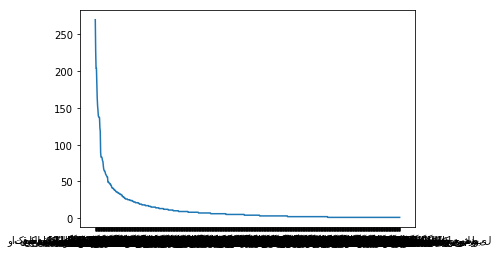

In [24]:
x, y = zip(*sorted_comments)
plt.plot(x, y)
plt.show()